/home/idiosyncratic/anaconda3/lib/python3.7/site-packages/impyute/util/preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()
/home/idiosyncratic/anaconda3/lib/python3.7/site-packages/impyute/imputation/cs/em.py:48: RuntimeWarning: invalid value encountered in double_scalars
  delta = (col[x_i]-previous)/previous


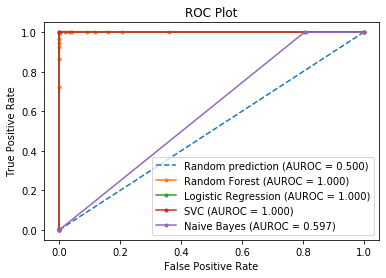

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import SMOTE

df = pd.read_csv('kag_risk_factors_cervical_cancer.csv')
df = df.replace('?', np.nan)
df = df.astype(float)

columns = df.columns

from impyute.imputation.cs import em
df = em(df)

df.columns = columns

x = df.drop(['Dx:Cancer','Schiller','Biopsy','Citology'], axis = 1)
y = df['Dx:Cancer']

rs = SMOTE()
x , y = rs.fit_resample(x, y)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier = rf_classifier.fit(x_train, y_train)

from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier = lr_classifier.fit(x_train,y_train)

from sklearn.svm import SVC
svc_classifier = SVC(probability = True)
svc_classifier = svc_classifier.fit(x_train,y_train)

from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier = nb_classifier.fit(x_train,y_train)

r_probs = [0 for _ in range(len(y_test))]

rf_pred = rf_classifier.predict_proba(x_test)
rf_pred = rf_pred[:,1]

lr_pred = lr_classifier.predict_proba(x_test)
lr_pred = lr_pred[:,1]

svc_pred = svc_classifier.predict_proba(x_test)
svc_pred = svc_pred[:,1]

nb_pred = nb_classifier.predict_proba(x_test)
nb_pred = nb_pred[:,1]
        
from sklearn.metrics import roc_curve, roc_auc_score

r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_pred)
lr_auc = roc_auc_score(y_test, lr_pred)
svc_auc = roc_auc_score(y_test, svc_pred)
nb_auc = roc_auc_score(y_test, nb_pred)

r_fpr,r_tpr,r_threshold = roc_curve(y_test, r_probs)
rf_fpr,rf_tpr,rf_threshold = roc_curve(y_test, rf_pred)
lr_fpr,lr_tpr,lr_threshold = roc_curve(y_test, lr_pred)
svc_fpr,svc_tpr,svc_threshold = roc_curve(y_test, svc_pred)
nb_fpr,nb_tpr,nb_threshold = roc_curve(y_test, nb_pred)

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr_auc)
plt.plot(svc_fpr, svc_tpr, marker='.', label='SVC (AUROC = %0.3f)' % svc_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()